# Grupo

| RA | Nome |
| :---------------- | :------: |
| 200109 | Leonardo Dimarchi Souza da Cruz |
| 200359 | Luiz Fernando Toquetto |
| 224072 | Vinícius Martins Granso |

# Dataset

O dataset escolhido foi o [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). Ele possui informações de variáveis físico-químicas (são as entradas) e dados sensoriais (sáida).

Iremos observar as colunas para entender o que cada uma significa, com a ajuda do fórum de discussões do Kaggle para as colunas menos intuitivas.

### Atributos

Variáveis ​​de entrada (com base em testes físico-químicos):

1 - fixed acidity

2 - volatile acidity

3 - citric acid
  
4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Variável de saída (com base em dados sensoriais)

12 - quality

In [2]:
import pandas as pd

# Lendo o dataset
dataset_original = pd.read_csv('winequality-red.csv')

# Exibindo as 5 primeiras linhas do dataset
display(dataset_original.head())

# Exibindo algumas estatísticas dos atributos
dataset_original.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Análise Exploratória de Dados (EDA)

### Verificar se existem valores ausentes 

Não existem valores nulos em nenhum dos atributos deste dataset.

### Correlação

Plotamos o heatmap da correlação dos atributos para identificar quais são mais relevantes para determinar o preço da casa. 
Removeremos alguns desses atributos na próxima etapa.

- As colunas alcohol, volatile acidity e sulphates são as colunas que se correlacionam melhor com a qualidade do vinho.



=========Verificando se existem valores ausentes=========
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


=========Correlação=========


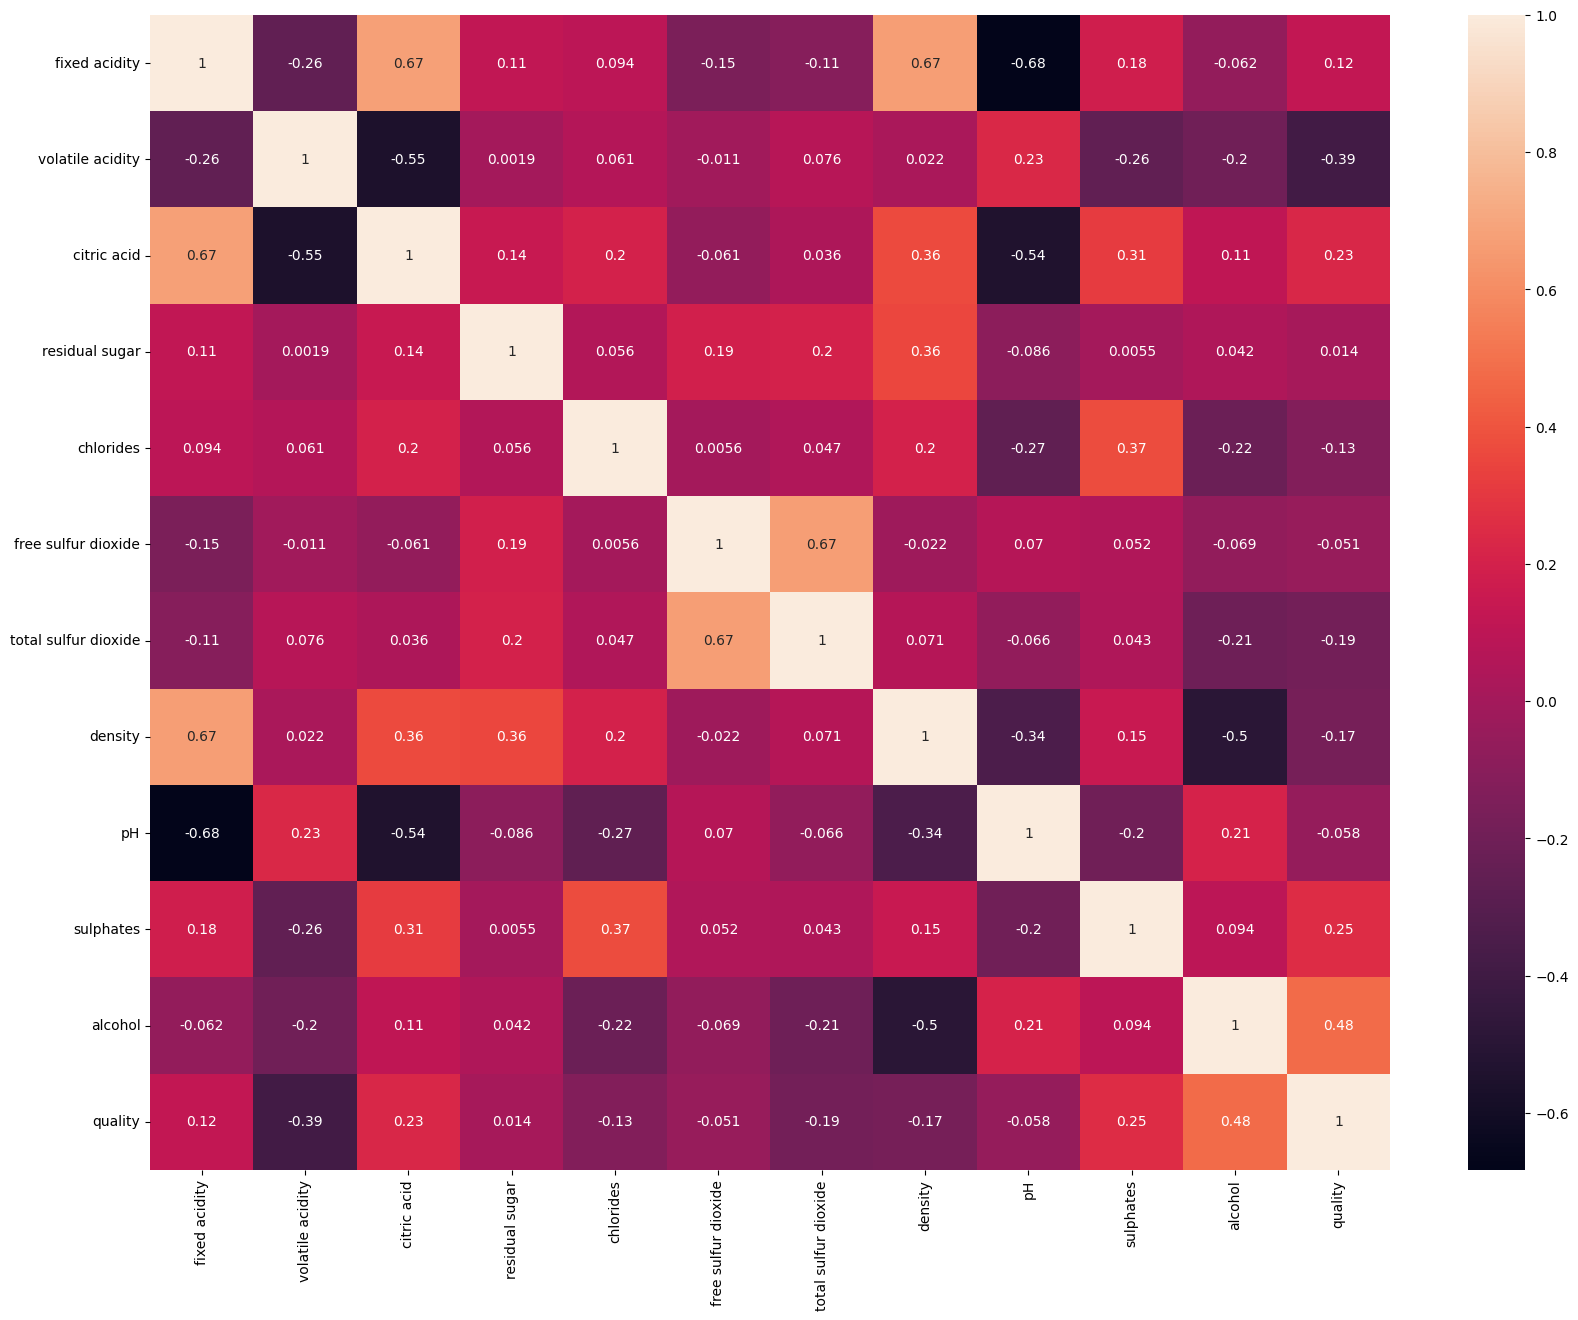

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = dataset_original.copy()

print("\n\n=========Verificando se existem valores ausentes=========")
soma_de_nulos_por_atributo = dataset.isnull().sum();
print(soma_de_nulos_por_atributo)

print("\n\n=========Correlação=========")
mapa_de_correlacao = dataset.corr()
plt.figure(figsize=(20,15))
sns.heatmap(mapa_de_correlacao, annot=True)
plt.show()


# Pré-processamento

### Remover atributos não relevantes

Dado o resultado do heatmap, removeremos os seguintes atributos:

- residual sugar
- free sulfur dioxide 
- pH 

### Outliers

Verificar

### Tratamento de desequilíbrio de classes






=========Removendo atributos não relevantes=========
Removendo os seguintes atributos:
['residual sugar', 'free sulfur dioxide', 'pH']


=========Outliers=========
Buscando por outliers no preço


,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
495,10.7,0.35,0.53,0.070,16.0,0.99720,0.65,11.0,8
1403,7.2,0.33,0.33,0.061,13.0,0.99600,1.10,10.0,8
390,5.6,0.85,0.05,0.045,88.0,0.99240,0.82,12.9,8
1061,9.1,0.40,0.50,0.071,16.0,0.99462,0.69,12.5,8
1202,8.6,0.42,0.39,0.068,12.0,0.99516,0.69,11.7,8
828,7.8,0.57,0.09,0.065,45.0,0.99417,0.74,12.7,8
481,9.4,0.30,0.56,0.080,17.0,0.99640,0.92,11.7,8
455,11.3,0.62,0.67,0.086,19.0,0.99880,0.69,13.4,8
1449,7.2,0.38,0.31,0.056,29.0,0.99472,0.76,11.3,8
440,12.6,0.31,0.72,0.072,29.0,0.99870,0.82,9.8,8


Plotando o boxplot


=========Tratamento de desequilíbrio=========


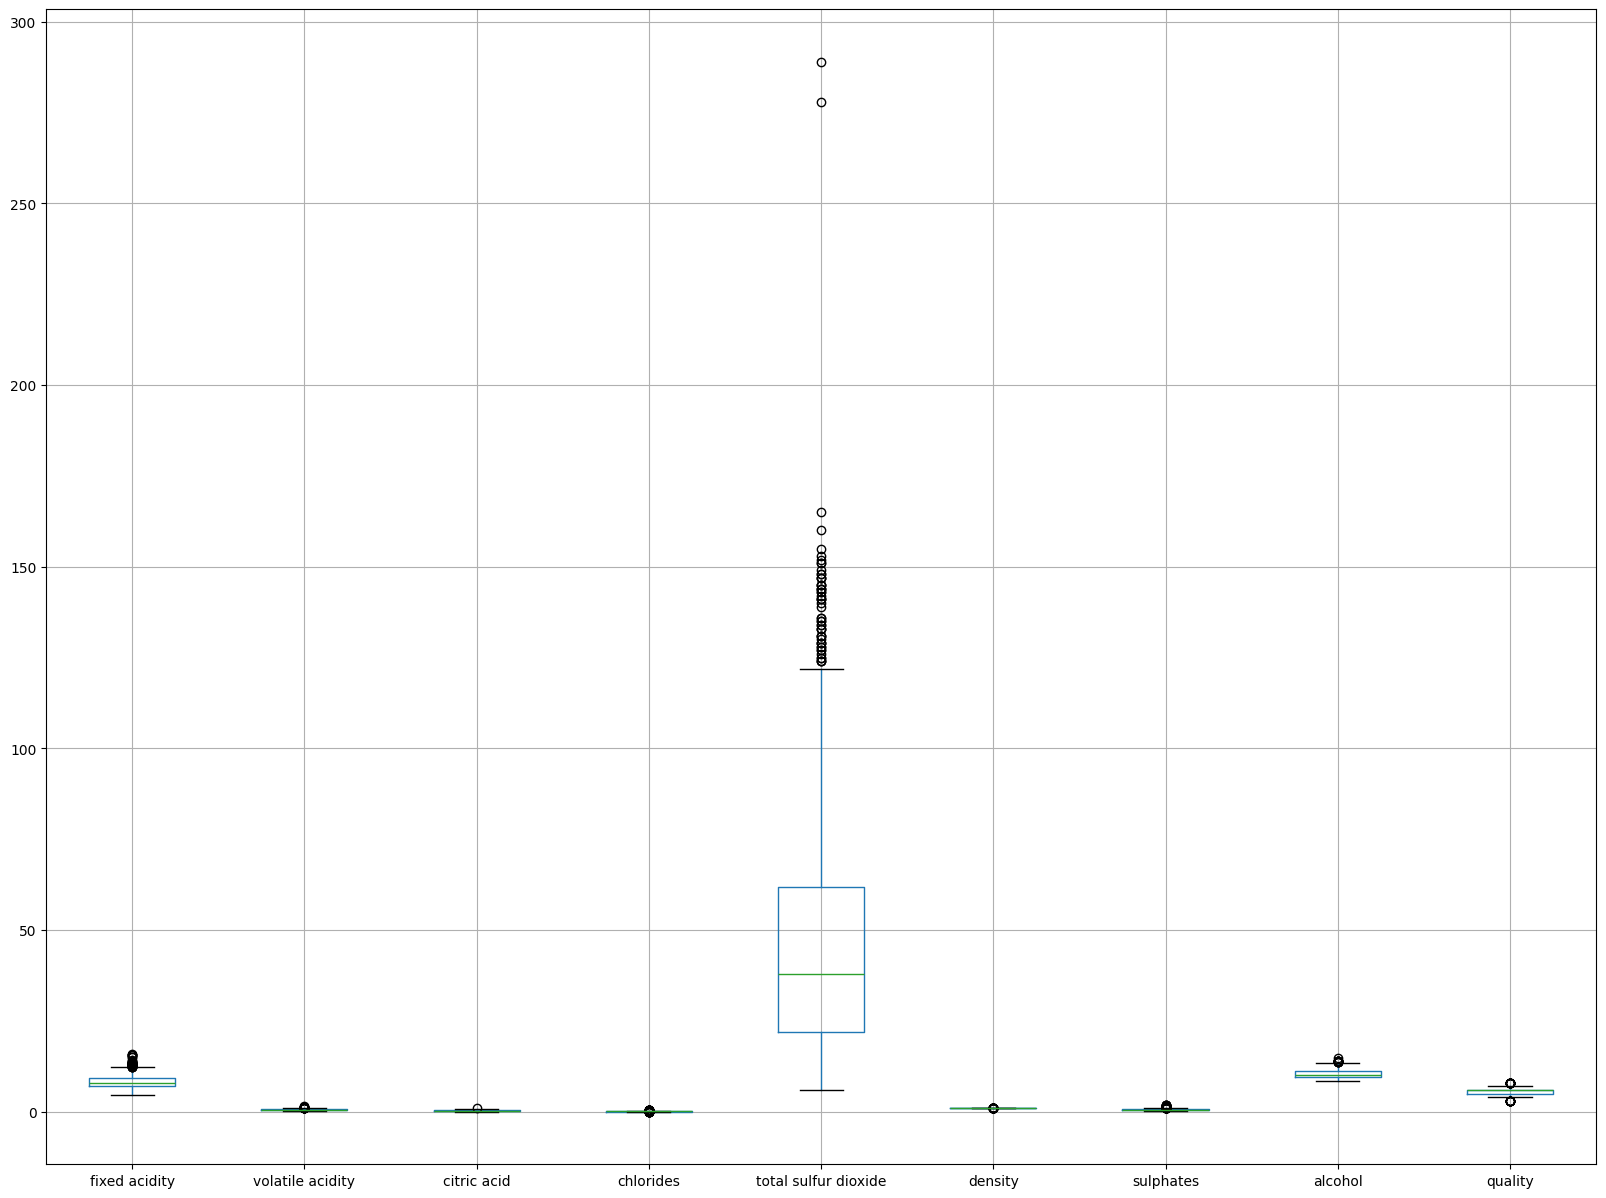

In [15]:
print("\n\n=========Removendo atributos não relevantes=========")
colunas_para_remover = ['residual sugar', 'free sulfur dioxide', 'pH']

print("Removendo os seguintes atributos:")
print(colunas_para_remover)
dataset_removed_columns = dataset.drop(colunas_para_remover, axis=1)

print("\n\n=========Outliers=========")
print("Buscando por outliers no preço")
sorted = dataset_removed_columns.sort_values(by=['quality'], ascending=False)
display(sorted.head(25))

print("Plotando o boxplot")
dataset_removed_columns.boxplot(figsize=(20,15))

print("\n\n=========Tratamento de desequilíbrio=========")


# Modelos de classificação

### Naive Bayes

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

dataset_tratado = dataset_removed_columns

X = dataset_tratado.drop(['quality'], axis=1)
y = dataset_tratado['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
# print(classification_report(y_test, y_pred))

Acurácia: 0.56


### KNN

### Redes neurais

# Avaliação e apresentação

Comparar os resultados e concluir